In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"parv1509","key":"131cec0ea91b12befcd5e48e87ec7460"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d shree1992/housedata


Dataset URL: https://www.kaggle.com/datasets/shree1992/housedata
License(s): unknown
  0% 0.00/432k [00:00<?, ?B/s]
100% 432k/432k [00:00<00:00, 1.08GB/s]


In [ ]:
!unzip housedata.zip


Archive:  housedata.zip
  inflating: data.csv                
  inflating: data.dat                
  inflating: output.csv              


In [ ]:
import pandas as pd

df = pd.read_csv("data.csv")
df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [ ]:
df.isnull().sum()

,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0
condition,0


In [ ]:
X = df[[
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "floors", "condition", "sqft_above", "sqft_basement",
    "yr_built", "yr_renovated", "waterfront", "view"
]]

y = df["price"]


In [ ]:
X = (X - X.mean()) / X.std()


In [ ]:
w = 0   # weight
b = 0   # bias
lr = 0.01
epochs = 100
losses = []


Gradient Descent

In [ ]:
n = len(X)

for _ in range(epochs):
    y_pred = w * X + b

    loss = (1/n) * np.sum((y - y_pred) ** 2)
    losses.append(loss)

    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    w = w - lr * dw
    b = b - lr * db-


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs

Prediction

In [ ]:
print("Weight:", w)
print("Bias:", b)

predicted_price = w * X + b


Weight: 0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
               ... 
sqft_lot        0.0
view            0.0
waterfront      0.0
yr_built        0.0
yr_renovated    0.0
Length: 4612, dtype: float64
Bias: 0               0.0
1               0.0
2               0.0
3               0.0
4               0.0
               ... 
sqft_lot        0.0
view            0.0
waterfront      0.0
yr_built        0.0
yr_renovated    0.0
Length: 4612, dtype: float64


In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

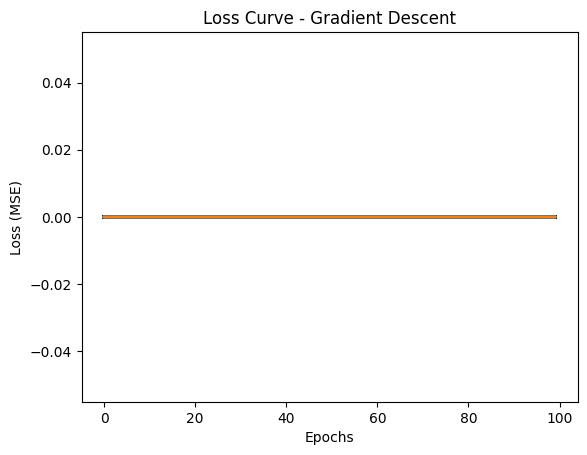

In [ ]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve - Gradient Descent")
plt.show()


Skearn Implementaion


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import joblib


In [ ]:
X = df[[
    "bedrooms", "bathrooms", "sqft_living", "sqft_lot",
    "floors", "condition", "sqft_above", "sqft_basement",
    "yr_built", "yr_renovated", "waterfront", "view"
]]

y = df["price"]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.predict(X_test)

array([ 304863.38578055,  326517.06991505, 1071762.53630085,
        546241.40097348,  379799.98321079,  605792.93622741,
        481263.57120645,  418905.11058128,  509341.50791914,
        530852.97588252,  682958.97641207,  414525.36130054,
        836974.40259896,  416500.85730817,  367263.43388218,
        702908.51672183,  677878.69067829,  515539.32999011,
       1019380.63891384,  861119.79490726, 1364866.21814692,
        637439.70016768,  634739.56666329,  470424.21250258,
        162037.15383029,  232831.37648239,  669951.05071595,
        884080.66694997,  263027.22577197,  974954.64229467,
       1883342.16391304,  481510.29664854, 1275554.65253718,
        430994.93178858,  180366.40705417,  339240.17357411,
        792335.7409401 , 1011053.14613368,  238036.20927673,
        543438.6604077 ,  423414.50597288,  243429.92107967,
        390151.30074072,  361322.6737568 ,  320343.34636013,
        317865.29287642,  469559.60646617,  573249.20158964,
        828966.75691606,

In [ ]:
y_pred = lr.predict(X_test)
mean_absolute_error(y_test, y_pred)


210908.17325012365

In [ ]:
mean_squared_error(y_test, y_pred)


986921767056.1438

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=5)
print("CV MAE:", -scores.mean())


CV MAE: 170132.26214893715


In [ ]:
from sklearn.model_selection import KFold


In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [ ]:
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    print("MAE for each fold:", mae_scores)
    print("Average MAE:", np.mean(mae_scores))



MAE for each fold: [210908.1732501162]
Average MAE: 210908.1732501162
MAE for each fold: [210908.1732501162, 152056.72244717536]
Average MAE: 181482.4478486458
MAE for each fold: [210908.1732501162, 152056.72244717536, 172899.58790662806]
Average MAE: 178621.49453463987
MAE for each fold: [210908.1732501162, 152056.72244717536, 172899.58790662806, 161142.96637639555]
Average MAE: 174251.8624950788
MAE for each fold: [210908.1732501162, 152056.72244717536, 172899.58790662806, 161142.96637639555, 153105.9673992468]
Average MAE: 170022.68347591237


In [ ]:
from sklearn.metrics import mean_absolute_error
mae_scores = []


In [ ]:
X = (X - X.mean()) / X.std()


In [ ]:
w=0
b=0
lr=0.1
epochs = 100
losses=[]


In [ ]:
n=len(X)
for _ in range(epochs):
  y_pred=w*X+b
  loss=(1/n)*np.sum((y-y_pred)**2)
  losses.append(loss)
  dw=(-2/n)*np.sum(X*(y-y_pred))
  db=(-2/n)*np.sum(y-y_pred)
  w=w-lr*dw
  b=b-lr*db

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs

In [ ]:
n = len(X)

for _ in range(epochs):
    y_pred = w * X + b

    loss = (1/n) * np.sum((y - y_pred) ** 2)
    losses.append(loss)

    dw = (-2/n) * np.sum(X * (y - y_pred))
    db = (-2/n) * np.sum(y - y_pred)

    w = w - lr * dw
    b = b - lr * db
